# Smarte und interaktive Kurzskripte (smartiS)


 
[P. Kersten](https://www.hshl.de/personen/prof-dr-ing-peter-kersten), [J. Jeschonowski](https://www.xing.com/profile/Jule_Jeschonowski/cv), [L.P. Kamegne-Kamdem](https://www.linkedin.com/in/leger-paco-kamegne-kamdem-07ba39184/), [N.B. Neathery](https://www.linkedin.com/in/noel-neathery-6371561a6/) und D.M. Weis

[Hochschule Hamm-Lippstadt](https://www.hshl.de), Marker Allee 76–78, D-59063 Hamm
___
# Mathematisches Pendel
- Experimentelle Bestimmung der Schwingungsdauer $T$
- Mit der Dimensionsanalyse und dem Experiment eine Formel für die Schwingungsdauer $T$ entwickeln
- Den Wert für die Erdbeschleunigung $g$ experimentell ermitteln

In [1]:
%matplotlib inline
import numpy as np
import sympy as sp
import math as m
import matplotlib.pyplot as plt
import ipywidgets as widgets
import scipy.optimize

from ipywidgets import interact
from sympy import symbols
from sympy.plotting import plot3d
from matplotlib.pyplot import figure
from IPython.display import Markdown, clear_output, display, HTML
from scipy.optimize import curve_fit

In [2]:
javascript_functions = {False: "hide()", True: "show()"}
button_descriptions  = {False: "Code anzeigen", True: "Code verbergen"}


javascript_funktion = {False: "hide()", True: "show()"}
schaltflaeche  = {False: "Quellcode anzeigen", True: "Quellcode verbergen"}


def quellcode_umschalten(state):

    output_string = "<script>$(\"div.input\").{}</script>"
    output_args   = (javascript_funktion[state],)
    output        = output_string.format(*output_args)
    display(HTML(output))


def schaltflaeche_aktion(value):

    state = value.new
    quellcode_umschalten(state)
    value.owner.description = schaltflaeche[state]


state = False
quellcode_umschalten(state)

button = widgets.ToggleButton(state, description = schaltflaeche[state])
button.observe(schaltflaeche_aktion, "value")

display(button)

ToggleButton(value=False, description='Quellcode anzeigen')

## Experimentelle Bestimmung der Schwingungsdauer $T$

Wir wollen die Schwingungsdauer $T$ eines mathematischen Pendels experimentell ermitteln. Gemäß der durchgeführten Dimensionsanalyse erwarten wir folgenden Zusammenhang:


$T\sim \sqrt{\frac{l}{g}}$

Hierbei sind $l$ die Fadenlänge und $g$ die Erdbeschleunigung. Diesen Zusammenhang wollen wir experimentell mit einfachen Mitteln (ein kleines Gewicht, ein Zwirnsfaden, ein Maßband und eine Stoppuhr reichen aus) folgendermaßen überprüfen:

- Wir messen die Schwingungsdauer $T$ für die Fadenlängen 0,50 m, 0,75 m, 1,00 m, 1,25 m und 1,5 m.

- Um eine höhere Genauigkeit bei der Zeitmessung zu erzielen, messen wir 10 volle Schwingungen (also jeweil hin- und zurück).

- Schreiben Sie die Meßwerte für die Fadenlänge (in der Einheit m) in den Vektor (variable `l`). 

- Schreiben Sie die Meßwerte für die Schwingungsdauer $T_{10}$ (in der Einheit s) in den Vektor (variable `T10`).

In [3]:
l = np.array([0.5, 0.75, 1.0, 1.25, 1.5]) # Messwerte der Fadenlänge
T10 = np.array([13.8, 17.0, 19.6, 21.6, 22.0]) # Messwerte der Schwingunszeiten für 10 volle Schwingungen

T = T10/10

Nun können wir die Meßwerte grafisch darstellen.

Text(0.5, 1.0, 'Das mathematische Pendel')

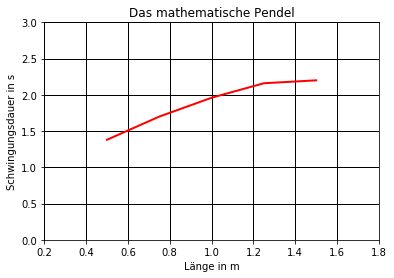

In [4]:
plt.plot(l,T,'r',lw=2)
plt.grid(color='k', linestyle='-', linewidth=1)
plt.ylim(0, 3)
plt.xlim(0.2, 1.8)
plt.xlabel('Länge in m')
plt.ylabel('Schwingungsdauer in s')
plt.title('Das mathematische Pendel')


## Mit der Dimensionsanalyse und dem Experiment eine Formel für die Schwingungsdauer $T$ entwickeln

Wenn der vermutete Zusammenhang $T\sim \sqrt{\frac{l}{g}}$ richtig ist, erwarten wir eine Funktionsverlauf der Form $T= \alpha \cdot l^{\beta}$.

Die Parameter $\alpha$ und $\beta$ können wir mit Hilfe einer Regressionsanalyse bestimmen.

In [5]:
def fit(x,a,b):
    return a * x**b

params, covariance = curve_fit(f = fit, xdata = l, ydata = T)

print('alpha:', params[0])
print('beta', params[1])

alpha: 1.9121234346738467
beta 0.4253363181803931


## Den Wert für die Erdbeschleunigung $g$ experimentell ermitteln

In Lehrbüchern finden wir folgende Formel für die Schwingungsdauer $T$ eines mathematischen Pendels:

$T = 2 \pi \sqrt{\frac{l}{g}}$

Diese Formel ermöglicht uns, die Erdbeschleunigung $g$ mit Hilfe einer Regressionsanalyse aus unseren Messwerten zu ermitteln.

Hierzu formen wir den Ausdruck für $T$ folgendermaßen um:   
$T = 2 \pi \cdot ({\frac{1}{g}})^{0,5} \cdot (l)^{0,5}$

Mit der Regression wird nun berechent, welcher optimaler Wert für $g$ resultiert, wenn sich die Meßwerte optimal an die exakte Formel anpassen sollen.

In [6]:
def fit1(x,g):
    return 2*m.pi*x**0.5 * (1/g)**0.5

params, covariance = curve_fit(f = fit1, xdata = l, ydata = T)
print('g:', params[0])

g: 10.895802090267464


## Beispiel - Das mathematische Pendel:<br>
Ein Pendel besteht im einfachsten Fall aus einem Körper mit der Masse $m$, der an einem Faden der Länge $l$ hängt. Das mathematische Pendel ist ein Idealisierung, bei dem der Pendelkörper als Punktmasse und der Faden als masselosbetrachtet wird.<br>

## Knowledge Check(s):
<ol>
    <li>Planen Sie Ihren Versuch zur Verifizierung der von Ihnen aus der Dimensionsanalyse ermittelten Formel, planen Sie<br>
        - die Anzahl der Versuche, den Aufbau der Wertetabelle, ...</li>
    <li>Führen Sie den Versuch der Dimensionsanalyse durch. *Tipp: Um den Messfehler bei $T$ zu minimieren, messen Sie z.B. 10 volle Schwingungen und teilen Sie das Ergebnis durch 10 </li>
    <li>Werten Sie den Versuch aus und überprüfen Sie, ob sich der aus der Dimensionsanalyse ermittelte Zusammenhang bestätigen lässt, in dem Sie die Anzahl der Messwerte eintragen und diese nach der Reihenfolge eintragen. </li>
</ol>

**Schwingungsdauer:**

Anzahl der Werte: 4


**Messung 1**

1. Wert für T: 0
Zum 1. Wert für T dazugehöriges l: 0


**Messung 2**

2. Wert für T: 1
Zum 2. Wert für T dazugehöriges l: 1


**Messung 3**

3. Wert für T: 1.8
Zum 3. Wert für T dazugehöriges l: 2


**Messung 4**

4. Wert für T: 2.6
Zum 4. Wert für T dazugehöriges l: 3


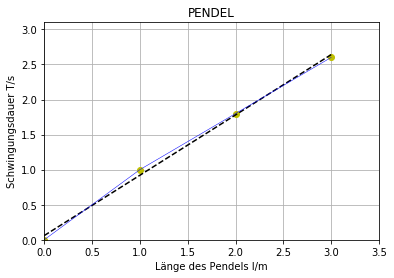

In [7]:
#variables/set up
display(Markdown('**Schwingungsdauer:**'))
n = int(input('Anzahl der Werte: '))
g = 9.81
values_T = np.zeros(n)
values_l = np.zeros(n)
values_m = np.zeros(n)

#Input values
for i in range (n):
    if i == 0:
        display(Markdown('**Messung 1**'))
        try:
            values_T[0] = float(input(f'{i+1}. Wert für T: '))
            values_l[0] = float(input(f'Zum {i+1}. Wert für T dazugehöriges l: '))
            '''values_m[0] = float(input(f'Zum {i+1}. Wert für T dazugehöriges m: '))'''
        except:
            values_T[0] = int(input(f'{i+1}. Wert für T: '))
            values_l[0] = int(input(f'Zum {i+1}. Wert für T dazugehöriges l: '))
            '''values_m[0] = int(input(f'Zum {i+1}. Wert für T dazugehöriges m: '))'''
    else:
        display(Markdown(f'**Messung {i+1}**'))
        try:
            values_T[i] = float(input(f'{i+1}. Wert für T: '))
            values_l[i] = float(input(f'Zum {i+1}. Wert für T dazugehöriges l: '))
            '''values_m[i] = float(input(f'Zum {i+1}. Wert für T dazugehöriges m: '))'''
        except:
            values_T[i] = int(input(f'{i+1}. Wert für T: '))
            values_l[i] = int(input(f'Zum {i+1}. Wert für T dazugehöriges l: '))
            '''values_m[i] = int(input(f'Zum {i+1}. Wert für T dazugehöriges m: '))'''
            
#regression line
coef = np.polyfit(values_l,values_T,1)
poly = np.poly1d(coef)

#plotting
plt.plot(values_l,values_T,'yo', values_l, poly(values_l), '--k')
plt.plot(values_l,values_T,'b',lw=0.5)
plt.xlim(0, max(values_l)+0.5)
plt.ylim(0, max(values_T)+0.5)
plt.xlabel('Länge des Pendels l/m')
plt.ylabel('Schwingungsdauer T/s')
plt.title('PENDEL')
plt.grid()
plt.show()

## Danksagung


Dieses digitale Lehr-/Lernmaterial wurde im Rahmen des Programms [Fellowships für Innovationen in der digitalen Hochschullehre](https://www.stifterverband.org/digital-lehrfellows-nrw/2019/temmen_kersten) des Ministeriums für Kultur und Wissenschaft des Landes Nordrhein-Westfalen und des Stifterverbandes entwickelt. 

Die Autoren stellen dieses digitale Lehr-/Lernmateriales als Open Educational Ressources unter der Lizenz [Creative Commons Attribution-ShareAlike 4.0 International License (CC BY-SA 4.0)](https://creativecommons.org/licenses/by-sa/4.0/) zur Verfügung.


    
<img align="left" src="https://licensebuttons.net/l/by-sa/3.0/88x31.png">